### Knock91: PyCaret で回帰 Model の前処理を実施しよう

In [1]:
# Boston の住宅価格 Dataset を取得
from pycaret.datasets import get_data
boston_data_all = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# 未見 Data の取得
boston_data = boston_data_all.sample(frac=0.90, random_state=0).reset_index(drop=True)
boston_data_unseen = boston_data_all.drop(boston_data.index).reset_index(drop=True)
print('All Data: ' + str(boston_data_all.shape))
print('Data for Modeling:' + str(boston_data.shape))  # 90% を訓練 Data として取り分け
print('Unseen Data For Predictions:' + str(boston_data_unseen.shape))
    # PyCaret に公開しない未見 Data として取り分け。学習済 Model の仕上げの評価時に利用する。

All Data: (506, 14)
Data for Modeling:(455, 14)
Unseen Data For Predictions:(51, 14)


In [3]:
# # setup 関数の実行
# from pycaret.regression import *  # PyCaret の回帰系 Library を import
#
# ret = setup(  # setup() 関数で Data を分析し、必要な前処理を自動的に行なってくれる。
#     boston_data,  # Dataset
#     target='medv',  # 目的変数を指定
#     normalize=False,  # 標準化するかどうかを指定
#     session_id=0  # PyCaret 実行時の識別子。内部的には乱数の seed となっており、指定しないと Random に決定される(sklean の random_state= にあたる）
# )

In [4]:
# setup Dialog で変数型の再確認
# setup Dialog で前処理結果の確認
from pycaret.regression import *  # PyCaret の回帰系 Library を import

ret = setup(  # setup() 関数で Data を分析し、必要な前処理を自動的に行なってくれる。
    boston_data,  # Dataset
    target='medv',  # 目的変数を指定
    normalize=False,  # 標準化するかどうかを指定
    session_id=0,  # PyCaret 実行時の識別子。内部的には乱数の seed となっており、指定しないと Random に決定される(sklean の random_state= にあたる）
    numeric_features=['chas'],  # 型を明示的に指定
    categorical_features=['rad']  # 型を明示的に指定
)

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(318, 21)"


`setup()` では欠損処理, Data の分割(train_test_split) などを実施しており、完了すると結果が表示され Data size や説明変数の数や各種前処理の指定の有無などを確認できる。

#### 代表的な項目
| 項目名                                         | 概要                                              |
|---------------------------------------------|-------------------------------------------------|
| Missing Values                              | 元の Data に欠損値がある場合、True が 表示される。                 |
| Transformed Train Set, Transformed Test Set | Default で訓練 Data は 70%, Test-data は 30% になっている。 |
| Categorical Features                        | 説明変数が Category変数に変換された数                         |

### Knock92: PyCaret で train_size を変更してみよう

In [5]:
# train_size の変更
ret = setup(boston_data,
            target='medv',
            session_id=0,
            normalize=False,
            numeric_features=['chas'],
            categorical_features=['rad'],
            train_size=0.8,  # 訓練 Data の分割の割合を指定
            silent=True  # Dialog の型確認を True にすると skip する。
            )

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(364, 21)"


### Knock93: PyCaret で回帰 Model を構築しよう

In [6]:
# PyCaret 対応の回帰 Model 一覧
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


PyCaret には Wrap されている Algorithm群で評価した結果を一覧で提示してくれる機能がある。

In [7]:
# 各 Model の評価一覧
compare_models(sort='R2', fold=10)
    # sort= していした項目で降順表示
    # fold= 交差検証を実施しており、Data の分割数を指定

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1839,9.5456,3.0433,0.8761,0.1401,0.1107,0.1640
gbr,Gradient Boosting Regressor,2.1968,9.3363,3.0085,0.8746,0.1395,0.1109,0.0210
lightgbm,Light Gradient Boosting Machine,2.3779,11.9894,3.4159,0.8436,0.1505,0.1185,0.0150
ada,AdaBoost Regressor,2.6713,12.6488,3.5252,0.8343,0.1708,0.1432,0.0210
rf,Random Forest Regressor,2.4777,13.1299,3.5434,0.8311,0.1585,0.1257,0.1940
lr,Linear Regression,3.4096,23.6076,4.7780,0.7074,0.2249,0.1714,0.2240
ridge,Ridge Regression,3.3909,23.8042,4.7885,0.7055,0.2287,0.1714,0.0050
br,Bayesian Ridge,3.4111,24.4277,4.8448,0.6996,0.2331,0.1726,0.0070
lar,Least Angle Regression,3.5413,24.7594,4.8886,0.6949,0.2301,0.1765,0.0090
huber,Huber Regressor,3.3084,26.5793,4.9671,0.6824,0.2404,0.1641,0.0120


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

`compare_models` を実行することで対応している各 Model の評価を一覧で表示。
この時点では Hyper Parameter の最適化は行なわれていない。よって、
1. 各 Model の評価一覧を表示
2. 精度の高い Model を複数選定
3. それぞれ tuning して評価

としてくことが、Model 構築していく一覧の流れになる。

### Knock94: PyCaret で Hyper parameter を tuning しよう

In [8]:
# 回帰 Model の作成
rf = create_model('rf', fold=10)  # 第１引数に 機械学習 Model の ID を渡すことで機械学習 Model を設定

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6951,17.7577,4.2140,0.8038,0.1707,0.1078
1,2.4529,11.0652,3.3264,0.9005,0.1622,0.1285
2,2.5246,11.3592,3.3703,0.8075,0.1525,0.1193
3,2.7081,22.7144,4.7660,0.6342,0.1783,0.1355
4,2.8522,21.2313,4.6077,0.7764,0.1977,0.1620
5,2.5445,11.2662,3.3565,0.9245,0.1736,0.1454
6,2.0312,6.8169,2.6109,0.8758,0.1411,0.1199
7,2.6908,14.6318,3.8252,0.8657,0.1668,0.1330
8,2.0722,5.9796,2.4453,0.9177,0.1153,0.0979


In [9]:
# Hyper Parameter Tuning
tuned_rf = tune_model(rf, optimize='r2', fold=10)  # optimize= に tuning の対象指標を指定
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0067,24.7128,4.9712,0.7270,0.1684,0.1143
1,2.6783,13.3939,3.6598,0.8796,0.1554,0.1315
2,2.1061,6.9402,2.6344,0.8824,0.1195,0.1020
3,2.3236,9.8265,3.1347,0.8417,0.1271,0.1076
4,3.4036,34.1707,5.8456,0.6401,0.2276,0.1853
5,2.9022,13.4361,3.6655,0.9100,0.1628,0.1463
6,2.0842,6.3144,2.5128,0.8850,0.1483,0.1268
7,3.1428,20.3447,4.5105,0.8132,0.1911,0.1512
8,2.2145,8.1430,2.8536,0.8879,0.1199,0.0996


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.05,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [10]:
# Hyper Parameter Tuning
tuned_rf = tune_model(rf, optimize='r2', fold=10, n_iter=50)  # n_iter= Parameter検索の繰り返し回数の指定（※Default: 10）
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6705,17.5881,4.1938,0.8057,0.1576,0.1073
1,2.6953,13.2585,3.6412,0.8808,0.1559,0.1325
2,2.0749,6.7700,2.6019,0.8853,0.1212,0.1030
3,2.3891,10.1788,3.1904,0.8361,0.1330,0.1136
4,3.1798,27.4997,5.2440,0.7104,0.2158,0.1802
5,2.7368,11.4151,3.3786,0.9235,0.1550,0.1404
6,2.0337,5.9824,2.4459,0.8910,0.1445,0.1230
7,3.0874,19.6551,4.4334,0.8196,0.1879,0.1477
8,2.1652,7.3241,2.7063,0.8992,0.1150,0.0972


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

PyCaret では、Tuning に RandomGrid検索が採用されている。
`n_iter=` の回数を増やすことで精度は向上するが、その分、時間はかかるようになる。

### Knock95: PyCaret で回帰 Model を評価しよう

In [11]:
# evaluate_model Dialog
evaluate_model(tuned_rf)  # Model を渡し表示される Dialog で、PlotType を切り替えることで、様々な評価指標が確認できる。

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

`Plot_model()` で個別に Graph を表示できる

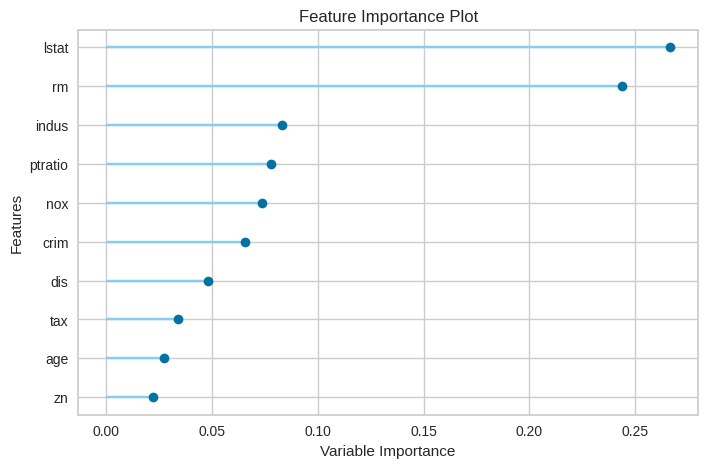

In [12]:
# Feature Importance  # 説明変数の重要度
plot_model(tuned_rf, 'feature')

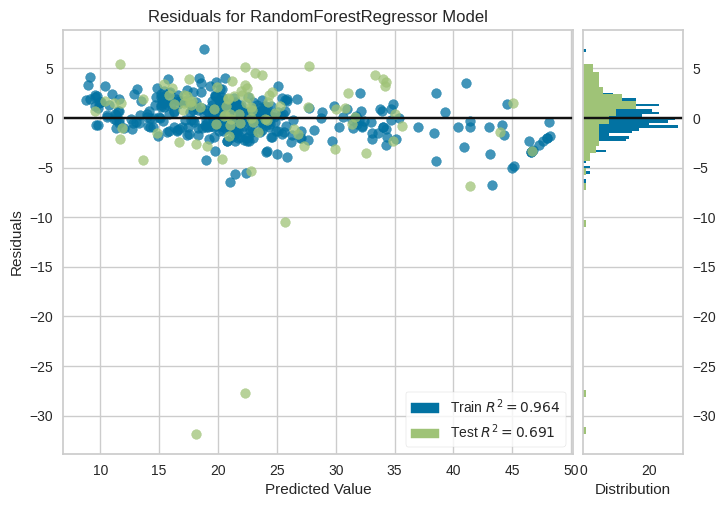

In [13]:
# Residuals Plot  # 残差Plot
plot_model(tuned_rf, 'residuals')

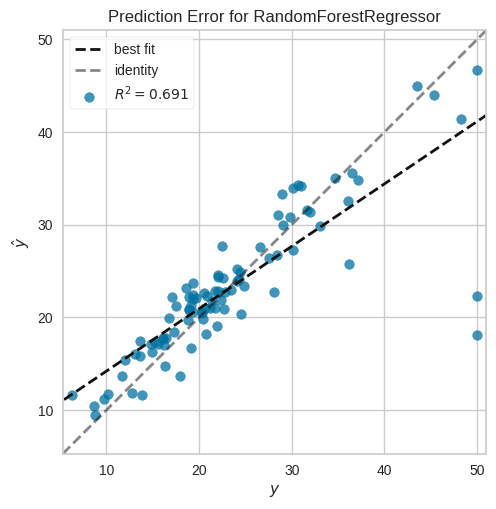

In [14]:
# Prediction Error Plot
## 予測精度を確認できる指標。identity に対するズレ（予測と実測の誤差）から Model が設定されている評価指標が計算される。
## 予測と実測が Equal になる場合、分布が y=x の直線付近に近づく。
plot_model(tuned_rf, 'error')

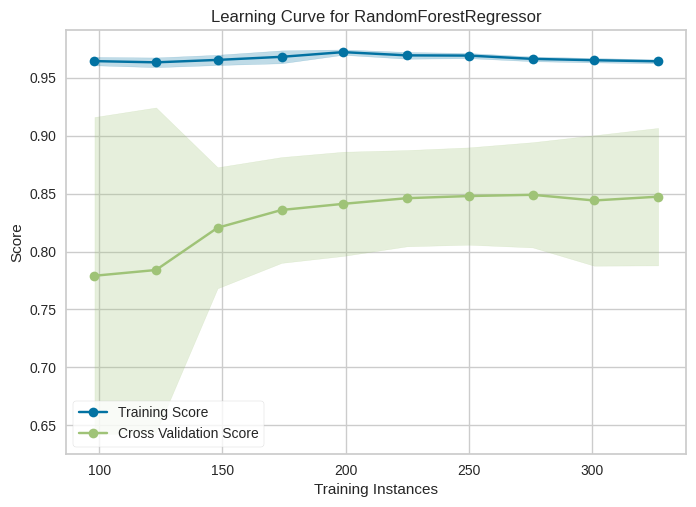

In [15]:
# Learning Curve（学習曲線を確認できる項目）
## 訓練 Data と Test Data の予測精度が、Data数に対してどのように推移しているかが分かる。
plot_model(tuned_rf, 'learning')

### Knock96: PyCaret で回帰 Model を完成させて再利用しよう

In [16]:
# Model の確定
final_rf = finalize_model(tuned_rf)
final_rf

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

`finalize_model()` は、`create_model()` の時には使われていなかった Holdout も使用して、Model の Performance を確定させる。

In [17]:
# 確定 Model で推論
predict_model(final_rf)  # 推論を実行。Test Data を使って推論され、評価指数が表示される。

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4521,3.8375,1.9589,0.9561,0.0882,0.0719


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,0.117470,12.5,7.87,0.0,0.524,6.009,82.900002,6.2267,311.0,15.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.900000,20.420621
1,0.072440,60.0,1.69,0.0,0.411,5.884,18.500000,10.7103,411.0,18.299999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.600000,21.353809
2,0.614700,0.0,6.20,0.0,0.507,6.618,80.800003,3.2721,307.0,17.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.100000,27.714919
3,0.071650,0.0,25.65,0.0,0.581,6.004,84.099998,2.1974,188.0,19.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.299999,20.365038
4,0.130580,0.0,10.01,0.0,0.547,5.872,73.099998,2.4775,432.0,17.799999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.400000,20.060681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,4.812130,0.0,18.10,0.0,0.713,6.701,90.000000,2.5975,666.0,20.200001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.400000,16.409644
87,0.013600,75.0,4.00,0.0,0.410,5.888,47.599998,7.3197,469.0,21.100000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.900000,19.679399
88,18.811001,0.0,18.10,0.0,0.597,4.628,100.000000,1.5539,666.0,20.200001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.900000,15.351710
89,1.232470,0.0,8.14,0.0,0.538,6.142,91.699997,3.9769,307.0,21.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.200000,16.423641


In [18]:
# 未見 Data で推論
predictions = predict_model(final_rf, data=boston_data_unseen)  # 未見Data である、boston_data_unseen を指定して推論を実施。
    # 予測値は Label として追加される
display(predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6933,6.3746,2.5248,0.6631,0.1712,0.1229


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,15.209421
1,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7,14.967431
2,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5,14.108571
3,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23,14.9,15.317036
4,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,20.0,18.092477
5,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,16.409644
6,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65,17.7,18.412431
7,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,18.845325
8,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,20.2,20.064201
9,7.83932,0.0,18.10,0,0.655,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4,20.300518


In [19]:
# Model の保存
save_model(final_rf, model_name='final_rf_model')  # model_name= に任意の File名を指定。Pickle として保存される。
    # 学習済み Model だけでなく、前処理の定義等、Pipeline ごとに保存される。
%ls

Transformation Pipeline and Model Successfully Saved
final_rf_model.pkl  logs.log  section09.ipynb


In [20]:
# Model の読み込み
load_tuned_rf_model = load_model(model_name='final_rf_model')  # model_name= で対象 File名を指定して読み込む。

load_tuned_rf_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['rad'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['chas'],
                                      target='medv', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impu

In [21]:
# Model の再利用
predictions = predict_model(load_tuned_rf_model, data=boston_data_unseen)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6933,6.3746,2.5248,0.6631,0.1712,0.1229


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,15.209421
1,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7,14.967431
2,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5,14.108571
3,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23,14.9,15.317036
4,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,20.0,18.092477
5,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,16.409644
6,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65,17.7,18.412431
7,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,18.845325
8,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,20.2,20.064201
9,7.83932,0.0,18.10,0,0.655,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4,20.300518


PyCaret では Pipeline ごと保存されて、再利用が可能なため、前処理を PyCaret で完結させておけば、Model との差分が発生しないようになっている。

### Knock97: PyCaret で回帰 Model を解釈しよう

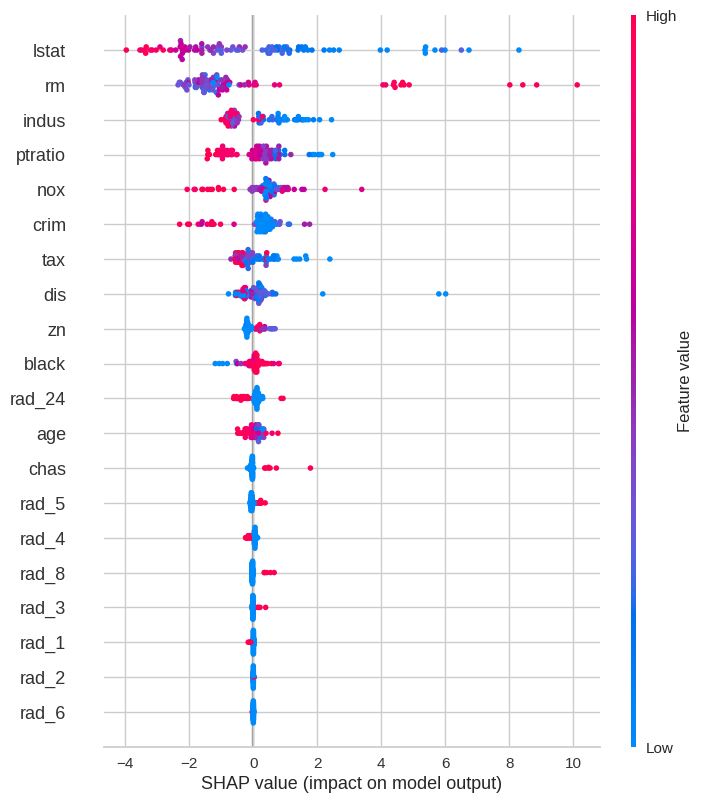

In [22]:
import shap

# summary_plot
interpret_model(final_rf)

summary_plot: どの説明変数が大きく影響していたかを図示。大局的に結果を見たい場合に便利。

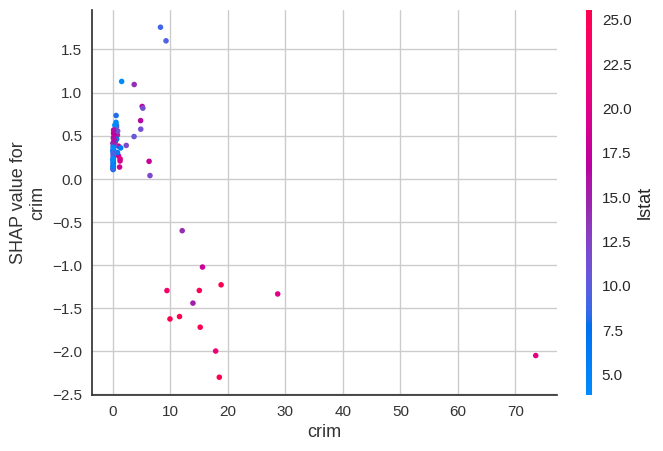

In [23]:
# dependence_plot
interpret_model(final_rf, plot='correlation')  # plot= に 'correlation' を指定

In [24]:
# force_plot
interpret_model(final_rf, plot='reason', observation=1)
# plot= に 'reason' 指定
# observation= で対象 Data の Index を指定する

### Knock98: PyCaret で分類 Model を構築しよう

In [25]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Data の取得
load_data = load_breast_cancer()
tg_df_all = pd.DataFrame(load_data.data, columns=load_data.feature_names)
tg_df_all['y'] = load_data.target
tg_df_all

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [27]:
# 前処理
tg_df = tg_df_all.sample(frac=0.90, random_state=0).reset_index(drop=True)
tg_df_unseen = tg_df_all.drop(tg_df.index).reset_index(drop=True)
print('All Data: ' + str(tg_df_all.shape))
print('Data for Modeling: ' + str(tg_df.shape))
print('Unseen Data For Predictions: ' + str(tg_df_unseen.shape))

All Data: (569, 31)
Data for Modeling: (512, 31)
Unseen Data For Predictions: (57, 31)


In [28]:
# 前処理
from pycaret.classification import *

ret = setup(data=tg_df,
            target='y',
            session_id=0,
            normalize=False,
            train_size=0.6,
            silent=True)

,Description,Value
0,session_id,0
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(512, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
# 分類 Model 一覧
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [30]:
# Model 評価一覧
compare_models(sort='F1', fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9641,0.9958,0.9850,0.9619,0.9729,0.9194,0.9217,0.1830
rf,Random Forest Classifier,0.9575,0.9902,0.9750,0.9611,0.9678,0.9053,0.9066,0.1980
qda,Quadratic Discriminant Analysis,0.9577,0.9922,0.9700,0.9660,0.9674,0.9070,0.9091,0.0060
ridge,Ridge Classifier,0.9511,0.0000,0.9900,0.9412,0.9641,0.8874,0.8944,0.0120
lightgbm,Light Gradient Boosting Machine,0.9509,0.9889,0.9750,0.9521,0.9630,0.8895,0.8916,0.0190
lda,Linear Discriminant Analysis,0.9478,0.9885,0.9800,0.9439,0.9611,0.8819,0.8859,0.0050
gbc,Gradient Boosting Classifier,0.9475,0.9910,0.9650,0.9574,0.9606,0.8815,0.8845,0.0550
dt,Decision Tree Classifier,0.9477,0.9398,0.9650,0.9568,0.9603,0.8835,0.8859,0.0050
ada,Ada Boost Classifier,0.9478,0.9900,0.9600,0.9611,0.9600,0.8848,0.8872,0.0320
nb,Naive Bayes,0.9413,0.9896,0.9600,0.9524,0.9550,0.8695,0.8741,0.0050


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [31]:
# Ridge Classifier
ridge = create_model('ridge', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
2,0.9355,0.0000,0.9500,0.9500,0.9500,0.8591,0.8591
3,0.9032,0.0000,1.0000,0.8696,0.9302,0.7748,0.7952
4,0.9677,0.0000,0.9500,1.0000,0.9744,0.9310,0.9332
5,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,1.0000,0.8696,0.9302,0.7568,0.7802
8,0.9667,0.0000,1.0000,0.9524,0.9756,0.9231,0.9258


In [32]:
# Hyper Parameter の最適化
tuned_ridge = tune_model(ridge, optimize='F1', fold=10, n_iter=100)
tuned_ridge

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8667,0.0000,1.0000,0.8333,0.9091,0.6667,0.7071
8,0.9000,0.0000,1.0000,0.8696,0.9302,0.7568,0.7802


RidgeClassifier(alpha=0.22, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=0, solver='auto',
                tol=0.001)

### Knock99: PyCaret で分類 Model を評価しよう

In [33]:
# evaluate_model Dialog
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

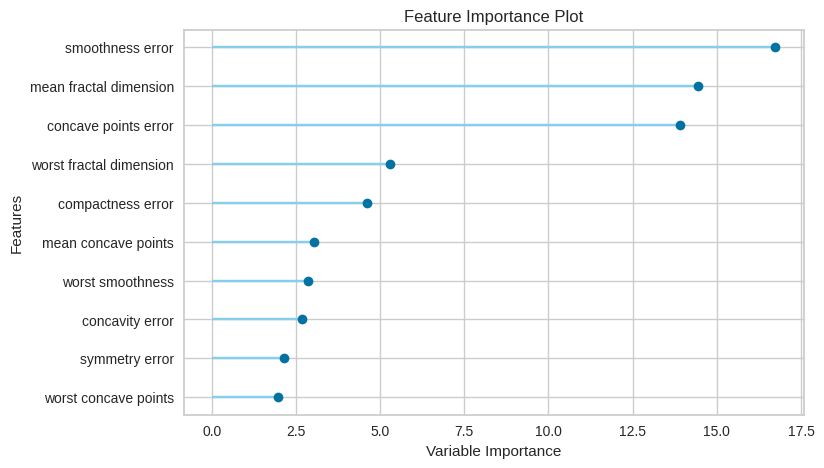

In [34]:
# Feature_importance
plot_model(tuned_ridge, 'feature')

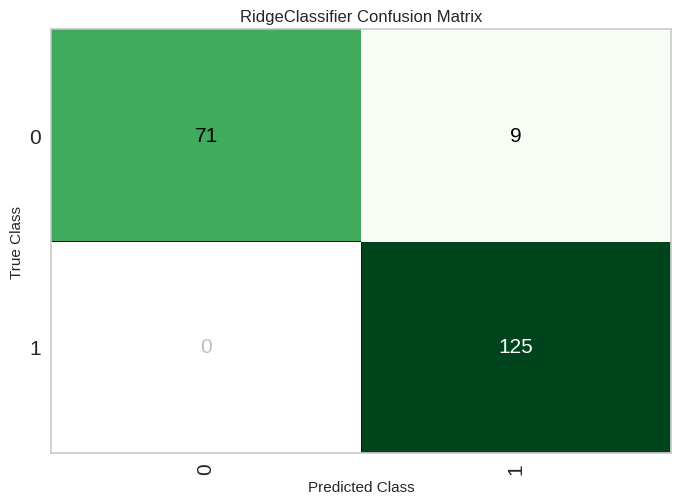

In [35]:
# Confusion Matrix
plot_model(tuned_ridge, plot='confusion_matrix')

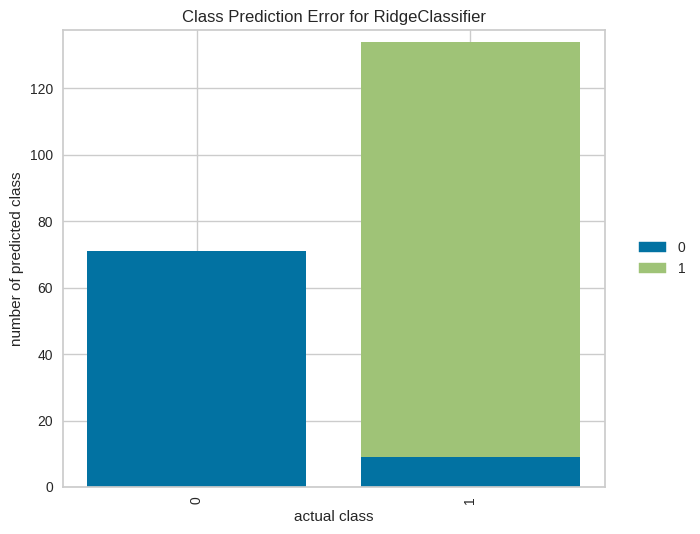

In [36]:
# Class Prediction Error Plot
plot_model(tuned_ridge, 'error')

#### Class Prediction Error
横軸に実際の Category, 予測を積み上げて棒で表現している。
Model がどの Category で問題を抱えているか、Category ごとにどのような不正解を与えているか確認できる。
異なる Model の長所と短所、および Dataset に特有の課題の発見に役立つ

In [37]:
# 確定 Model での推論
final_ridge = finalize_model(tuned_ridge)
predict_model(final_ridge)
predictions = predict_model(final_ridge, data=tg_df_unseen)
display(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9512,0.9397,0.9920,0.9323,0.9612,0.8956,0.8988


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9474,0.9169,0.9767,0.9545,0.9655,0.8545,0.8555


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,Label
0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325,...,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0,0
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,0.1739,0.05640,...,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048,1,1
2,15.050,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954,0,1
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.043020,0.025940,0.1927,0.06211,...,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783,1,1
4,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,0.1860,0.05941,...,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863,0,0
5,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.141100,0.094310,0.1802,0.06188,...,160.50,1646.0,0.14170,0.33090,0.41850,0.16130,0.2549,0.09136,0,0
6,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,0.07253,...,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893,1,1
7,12.750,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,0.2120,0.06623,...,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,1,1
8,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,0.2197,0.07696,...,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982,1,1
9,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.231000,0.147100,0.1991,0.06739,...,205.70,2642.0,0.13420,0.41880,0.46580,0.24750,0.3157,0.09671,0,0
